In [1]:
import numpy as np
import pandas as pd

from map_utils.plot import set_plotting_style, plot_map_x3

In [2]:
set_plotting_style()

In [3]:
activity_map = pd.read_csv("outputs/gcp0004/map_technical.csv.gz")
activity_map["-log10(mAP p-value)"] = -np.log10(activity_map.corrected_p_value)
activity_map.rename(
    {
        "mean_average_precision": "mAP",
        "below_corrected_p": "p < 0.05",
    },
    axis=1,
    inplace=True,
)
activity_map.head(10)

,Metadata_broad_sample,mAP,p_value,corrected_p_value,below_p,p < 0.05,-log10(mAP p-value)
0,BRD-A00147595-001-01-5,0.174285,0.459654,0.813797,False,False,0.089484
1,BRD-A00218260-001-03-4,0.258944,0.237776,0.497924,False,False,0.302837
2,BRD-A00376169-001-01-6,0.123660,0.721928,0.932184,False,False,0.030498
3,BRD-A00546892-001-02-6,0.103840,0.862214,0.932184,False,False,0.030498
4,BRD-A00938334-001-01-3,0.141416,0.610939,0.927122,False,False,0.032863
5,BRD-A01636364-003-15-1,0.596329,0.017598,0.051538,True,False,1.287875
6,BRD-A01787639-003-16-9,0.194354,0.386361,0.726994,False,False,0.138469
7,BRD-A02006392-001-10-7,0.217153,0.423558,0.771816,False,False,0.112486
8,BRD-A02367930-001-04-5,0.777778,0.002200,0.007789,True,True,2.108506
9,BRD-A02710418-003-11-8,0.146165,0.768223,0.932184,False,False,0.030498


/dgx1nas1/storage/data/akalinin/projects/map/map_utils/plot.py:126: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


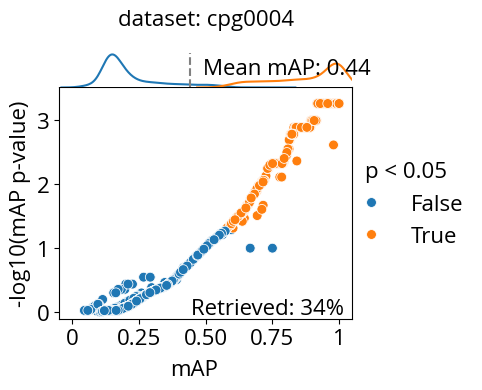

In [4]:
activity_map["const"] = "dataset: cpg0004"
plot_map_x3(activity_map, "const", "", pr_x=0.45, pr_y=0.02, l_x=1.05, l_y=0.58)

In [5]:
activity_map[activity_map["p < 0.05"]].Metadata_broad_sample.to_csv(
    "outputs/gcp0004/tech_replicable.csv", index=False
)